In [1]:
import pandas as pd

In [2]:
# Load the datasets
data_last = pd.read_csv('data/data_last.csv')
data_volume = pd.read_csv('data/data_volume.csv')
data_mkt_cap = pd.read_csv('data/data_mkt_cap.csv')

# Ensure the 'date' columns are datetime type for all datasets
data_last['date'] = pd.to_datetime(data_last['date'])
data_volume['date'] = pd.to_datetime(data_volume['date'])
data_mkt_cap['date'] = pd.to_datetime(data_mkt_cap['date'])

# Merge the datasets on 'ticker' and 'date'
merged_data = pd.merge(data_last, data_volume, on=['ticker', 'date'])
merged_data = pd.merge(merged_data, data_mkt_cap, on=['ticker', 'date'])

# Sort merged data by date
merged_data.sort_values(by=['date', 'ticker'], inplace=True)

# Display the first few rows of the merged DataFrame to verify the merge
merged_data.head()


,ticker,date,last,volume,mkt_cap
0,1332 JT,2017-08-16,562.12,1641300.0,199642.95
1599,1333 JT,2017-08-16,2831.87,131600.0,167448.97
3198,1334 JT,2017-08-16,167.00,0.0,84317.35
4797,1605 JT,2017-08-16,827.72,3274100.0,1532515.13
6396,1721 JT,2017-08-16,1999.24,588100.0,337413.00


In [3]:
# Assuming merged_data is your DataFrame with 'date', 'ticker', 'last' (closing price), 'volume', and 'mkt_cap'

# Calculate daily relative mkt_cap change
merged_data['last_change'] = merged_data.groupby('ticker')['last'].pct_change()
top_k = 5 

# Function to simulate trades and calculate cumulative profit
def simulate_trades_last(data, n_stocks=10):
    cumulative_profit = 0
    profits = []

    for date in sorted(data['date'].unique()):
        todays_data = data[data['date'] == date]
        todays_data = todays_data.sort_values(by='last_change', ascending=False).head(n_stocks)
        
        # Simulate buying at closing price and selling at next day's closing price
        for index, row in todays_data.iterrows():
            buy_price = row['last']
            ticker = row['ticker']
            try:
                # Assume selling at next available closing price
                sell_price = data[(data['ticker'] == ticker) & (data['date'] > date)].iloc[0]['last']
                profit = sell_price - buy_price
                cumulative_profit += profit
                profits.append(profit)
            except IndexError:
                # No next day data to sell, assuming end of dataset
                pass
    
    return cumulative_profit, profits

cumulative_profit_last, profits_last = simulate_trades_last(merged_data, top_k)
print(f"Cumulative Profit: {cumulative_profit_last}")


Cumulative Profit: 32382.439999999988


In [4]:
# Assuming merged_data is your DataFrame with 'date', 'ticker', 'last' (closing price), 'volume', and 'mkt_cap'

# Calculate daily relative volume change
merged_data['volume_change'] = merged_data.groupby('ticker')['volume'].pct_change()

# Function to simulate trades and calculate cumulative profit
def simulate_trades_vol(data, n_stocks=10):
    cumulative_profit = 0
    profits = []

    for date in sorted(data['date'].unique()):
        todays_data = data[data['date'] == date]
        todays_data = todays_data.sort_values(by='volume_change', ascending=False).head(n_stocks)
        
        # Simulate buying at closing price and selling at next day's closing price
        for index, row in todays_data.iterrows():
            buy_price = row['last']
            ticker = row['ticker']
            try:
                # Assume selling at next available closing price
                sell_price = data[(data['ticker'] == ticker) & (data['date'] > date)].iloc[0]['last']
                profit = sell_price - buy_price
                cumulative_profit += profit
                profits.append(profit)
            except IndexError:
                # No next day data to sell, assuming end of dataset
                pass
    
    return cumulative_profit, profits

cumulative_profit_vol, profits_vol = simulate_trades_vol(merged_data, top_k)
print(f"Cumulative Profit: {cumulative_profit_vol}")


Cumulative Profit: 15125.169999999982


In [5]:
# Assuming merged_data is your DataFrame with 'date', 'ticker', 'last' (closing price), 'volume', and 'mkt_cap'

# Calculate daily relative mkt_cap change
merged_data['cap_change'] = merged_data.groupby('ticker')['mkt_cap'].pct_change()

# Function to simulate trades and calculate cumulative profit
def simulate_trades_cap(data, n_stocks=10):
    cumulative_profit = 0
    profits = []

    for date in sorted(data['date'].unique()):
        todays_data = data[data['date'] == date]
        todays_data = todays_data.sort_values(by='cap_change', ascending=False).head(n_stocks)
        
        # Simulate buying at closing price and selling at next day's closing price
        for index, row in todays_data.iterrows():
            buy_price = row['last']
            ticker = row['ticker']
            try:
                # Assume selling at next available closing price
                sell_price = data[(data['ticker'] == ticker) & (data['date'] > date)].iloc[0]['last']
                profit = sell_price - buy_price
                cumulative_profit += profit
                profits.append(profit)
            except IndexError:
                # No next day data to sell, assuming end of dataset
                pass
    
    return cumulative_profit, profits

cumulative_profit_cap, profits_cap = simulate_trades_cap(merged_data, top_k)
print(f"Cumulative Profit: {cumulative_profit_cap}")


Cumulative Profit: 31415.20000000002


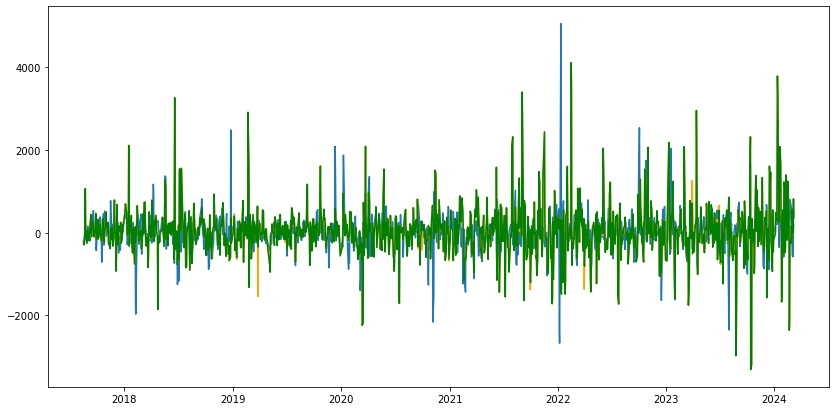

In [8]:
summed_profits_last = [sum(profits_last[i:i+10]) for i in range(0, len(profits_last), top_k)]
summed_profits_vol = [sum(profits_vol[i:i+10]) for i in range(0, len(profits_vol), top_k)]
summed_profits_cap = [sum(profits_cap[i:i+10]) for i in range(0, len(profits_cap), top_k)]
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data_last['date'].unique()[1:],summed_profits_last, color='green')
plt.plot(data_last['date'].unique()[1:],summed_profits_vol)
plt.plot(data_last['date'].unique()[1:],summed_profits_cap, color='orange')